### import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os

# Add project root to path
sys.path.append(os.path.abspath(".."))  # ".." because notebook is inside notebook/


In [3]:
from src.data.load_and_clean import load_data, clean_data

# Load and clean the full dataset
df = load_data(r"C:\Users\Dell\Pictures\acis-insurance-eda\data\raw\MachineLearningRating_v3.txt")
df = clean_data(df)

# Quick check
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())


c:\Users\Dell\Pictures\acis-insurance-eda\src\data\load_and_clean.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


(1000098, 52)
   UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered  \
0               145249     12827       2015-03-01             True   
1               145249     12827       2015-05-01             True   
2               145249     12827       2015-07-01             True   
3               145255     12827       2015-05-01             True   
4               145255     12827       2015-07-01             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - Windscreen

In [4]:
print(df.columns.tolist())


['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


### Convert categorical columns

In [5]:
categorical_cols = ['Province', 'VehicleType', 'Gender', 'make', 'Model']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')
    else:
        print(f"Column '{col}' not found in the dataset.")

### Check missing values

In [6]:
print("\nMissing values in dataset:")
print(df.isnull().sum())


Missing values in dataset:
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552


### Compute Loss Ratio

In [7]:
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

### Univariate Analysis

In [8]:
numerical_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']

### Histograms for numerical columns

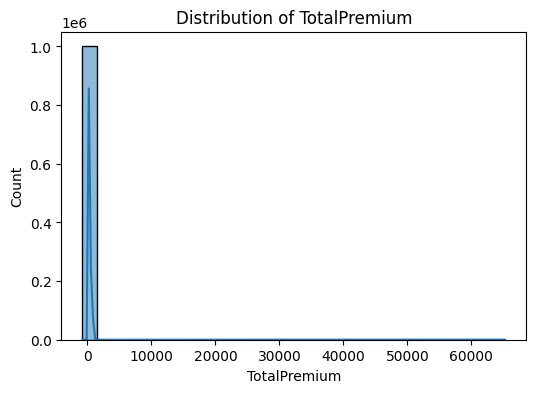

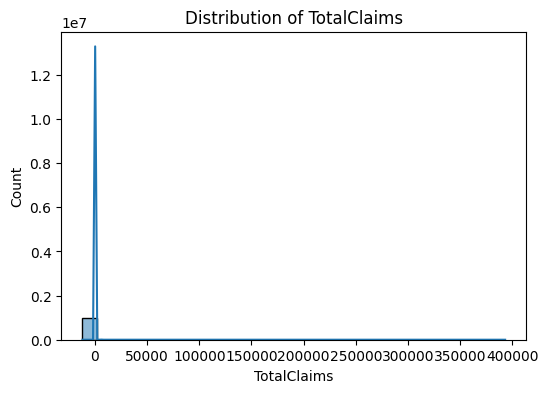

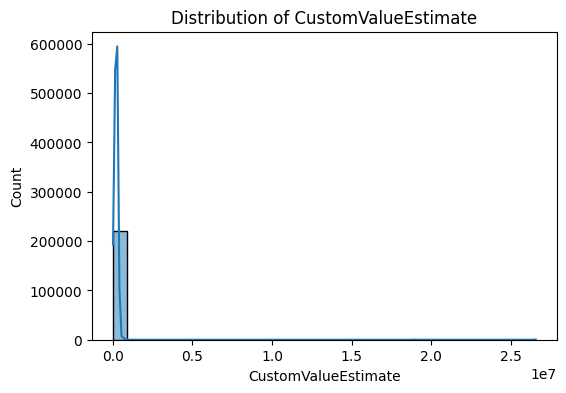

In [9]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### Bar plots for categorical columns

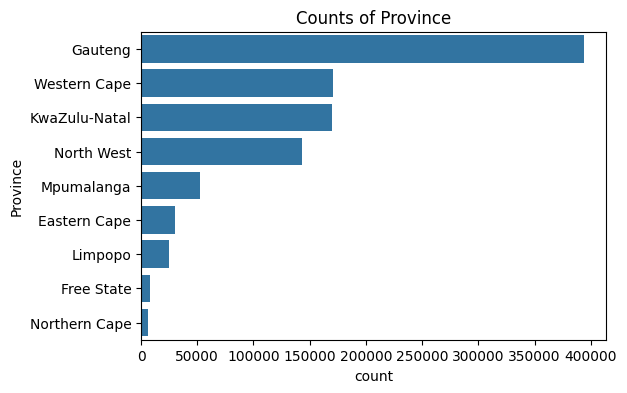

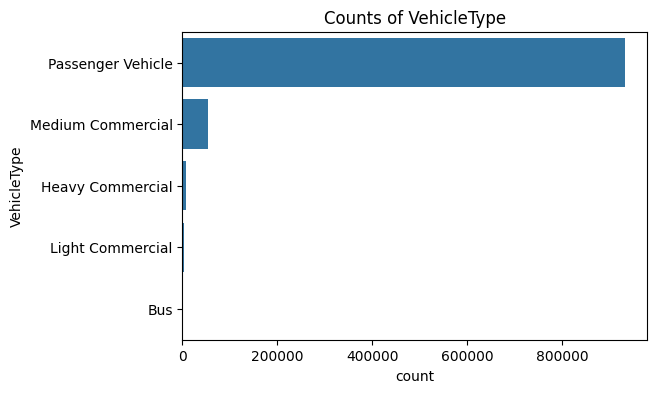

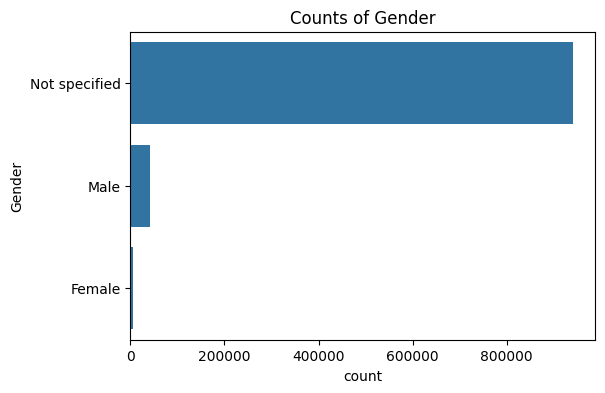

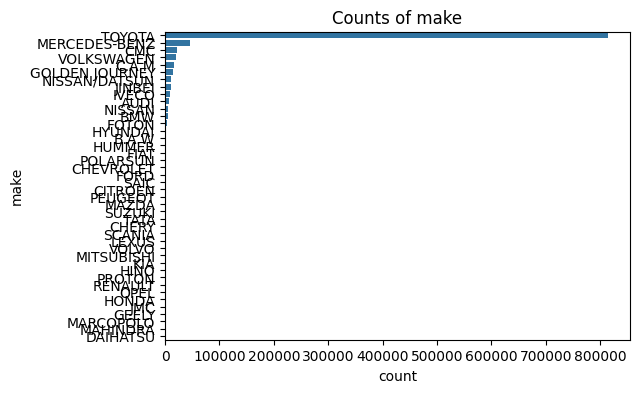

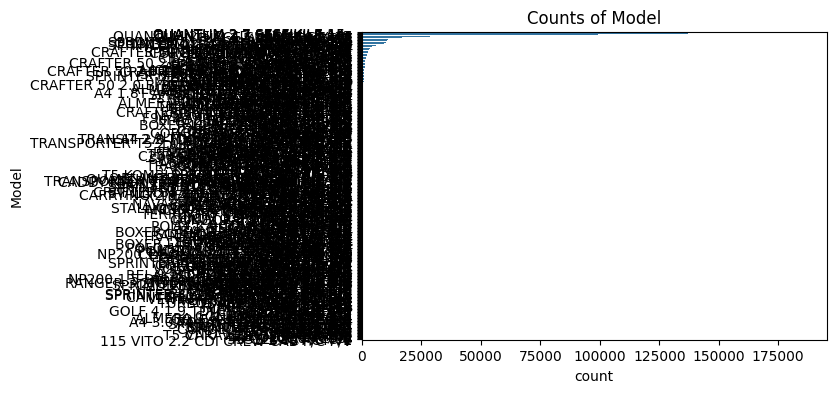

In [10]:
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Counts of {col}')
        plt.show()


### Bivariate / Multivariate Analysis

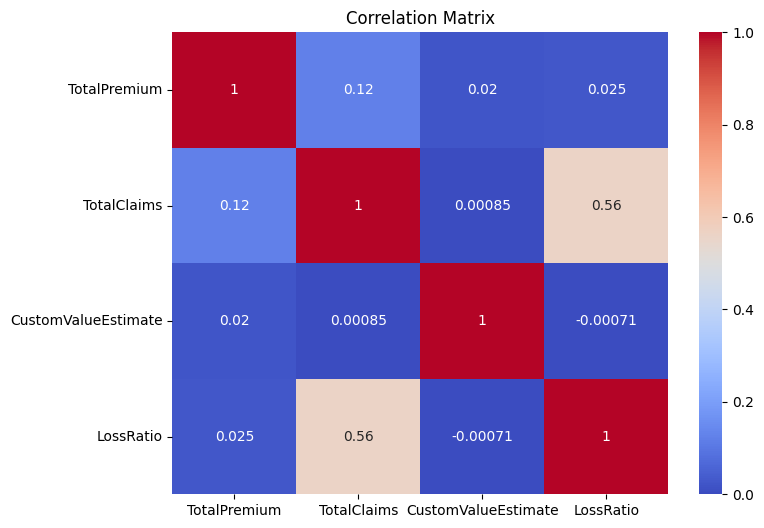

In [11]:
# Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols + ['LossRatio']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

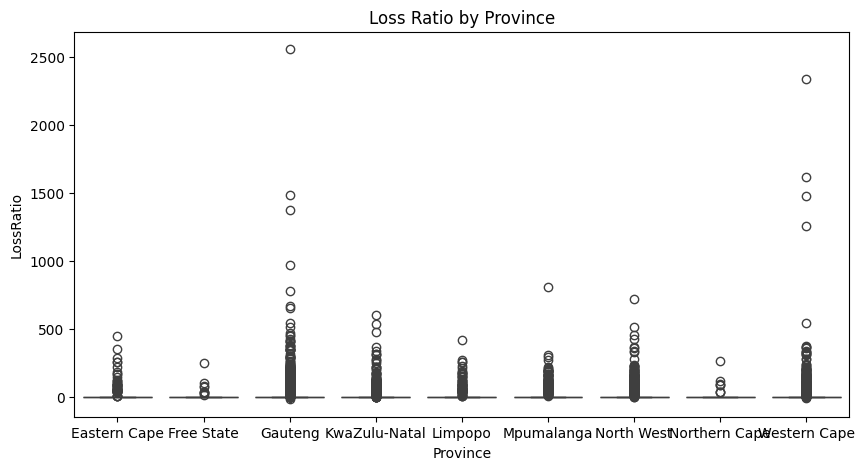

In [12]:
# Loss Ratio by Province
if 'Province' in df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Province', y='LossRatio', data=df)
    plt.title('Loss Ratio by Province')
    plt.show()

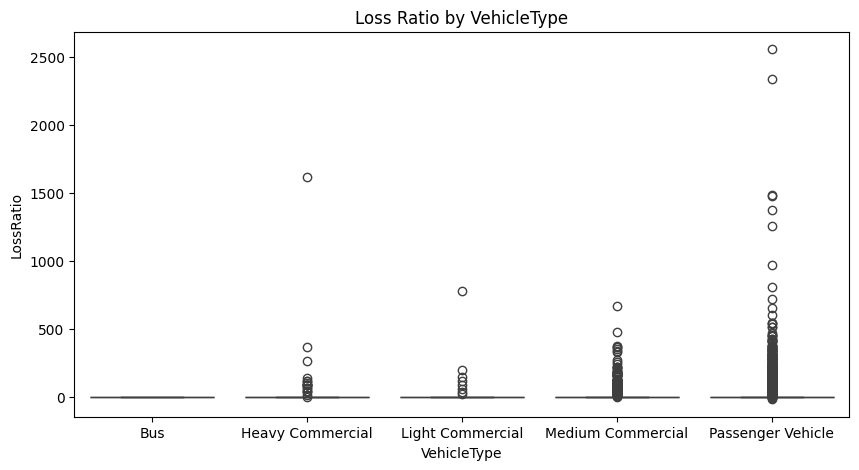

In [13]:
# Loss Ratio by VehicleType
if 'VehicleType' in df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='VehicleType', y='LossRatio', data=df)
    plt.title('Loss Ratio by VehicleType')
    plt.show()

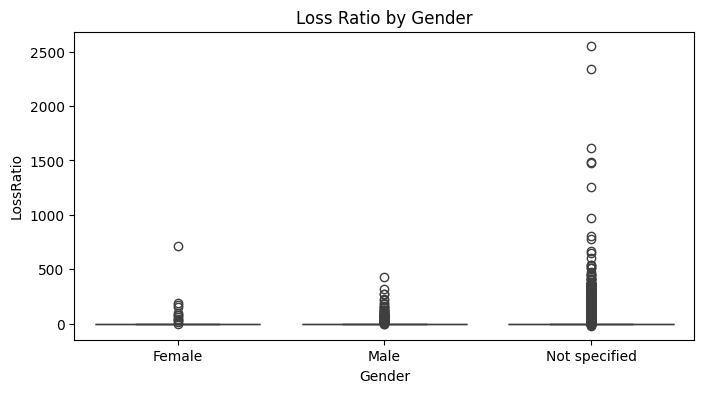

In [14]:
# Loss Ratio by Gender
if 'Gender' in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Gender', y='LossRatio', data=df)
    plt.title('Loss Ratio by Gender')
    plt.show()

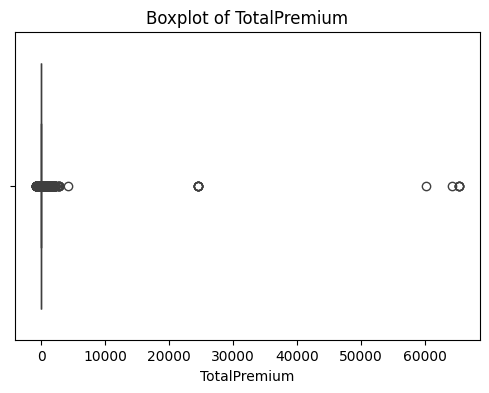

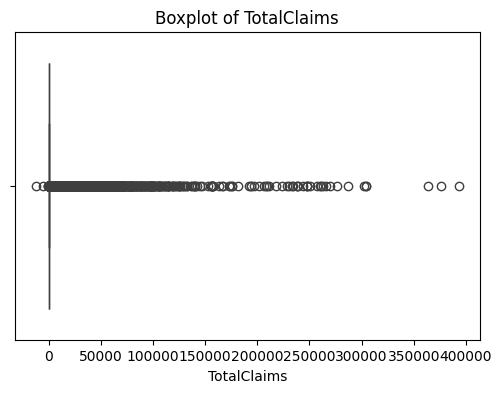

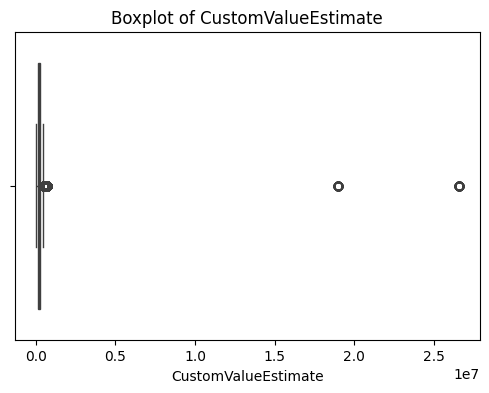

In [15]:
# -------------------------------
# Step 8: Outlier Detection
# -------------------------------
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


### Creative Visualizations

C:\Users\Dell\AppData\Local\Temp\ipykernel_23136\3260887303.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_vehicles = df.groupby('make')['TotalClaims'].sum().sort_values(ascending=False).head(10)


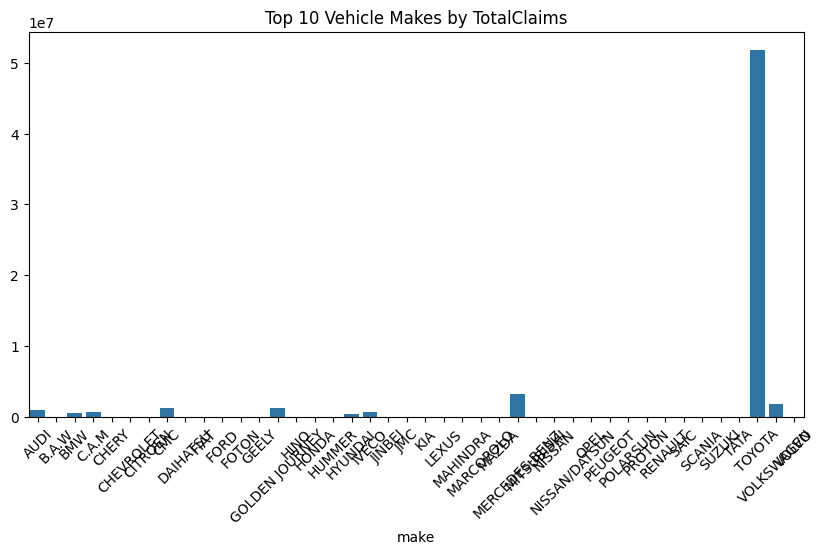

In [16]:
# 1. Top 10 vehicle makes by TotalClaims
if 'make' in df.columns:
    top_vehicles = df.groupby('make')['TotalClaims'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_vehicles.index, y=top_vehicles.values)
    plt.xticks(rotation=45)
    plt.title("Top 10 Vehicle Makes by TotalClaims")
    plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_23136\1756526502.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Province', y='LossRatio', data=df, palette=palette2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_23136\1756526502.py:11: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  ax = sns.boxplot(x='Province', y='LossRatio', data=df, palette=palette2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_23136\1756526502.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby(['Province'])['LossRatio'].median()


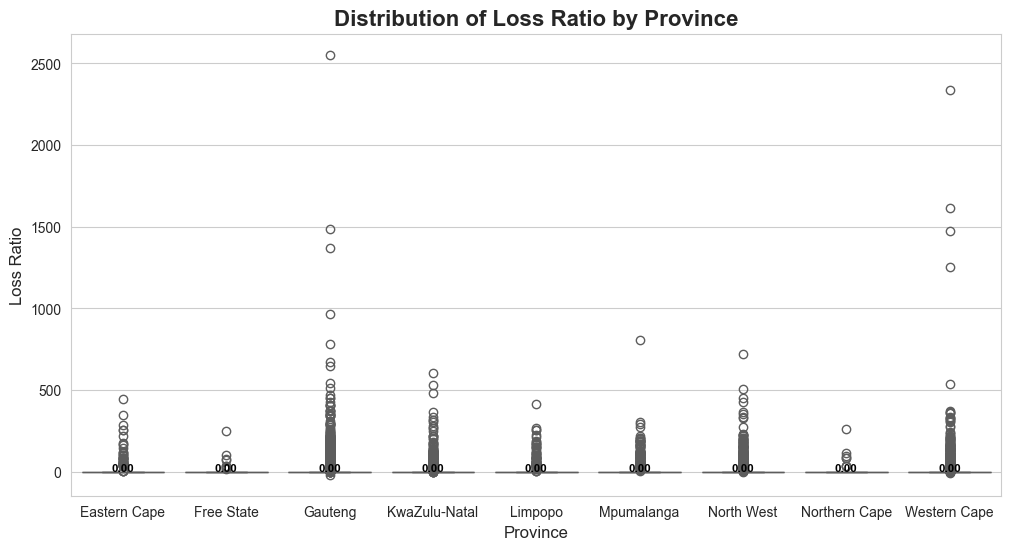

C:\Users\Dell\AppData\Local\Temp\ipykernel_23136\1756526502.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_vehicles = df.groupby('make')['TotalClaims'].sum().sort_values(ascending=False).head(10)
C:\Users\Dell\AppData\Local\Temp\ipykernel_23136\1756526502.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_vehicles.index, y=top_vehicles.values, palette=palette1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_23136\1756526502.py:32: UserWarning: 
The palette list has fewer values (10) than needed (42) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=top_vehicles.index, y=top_vehicles.values, palette=pa

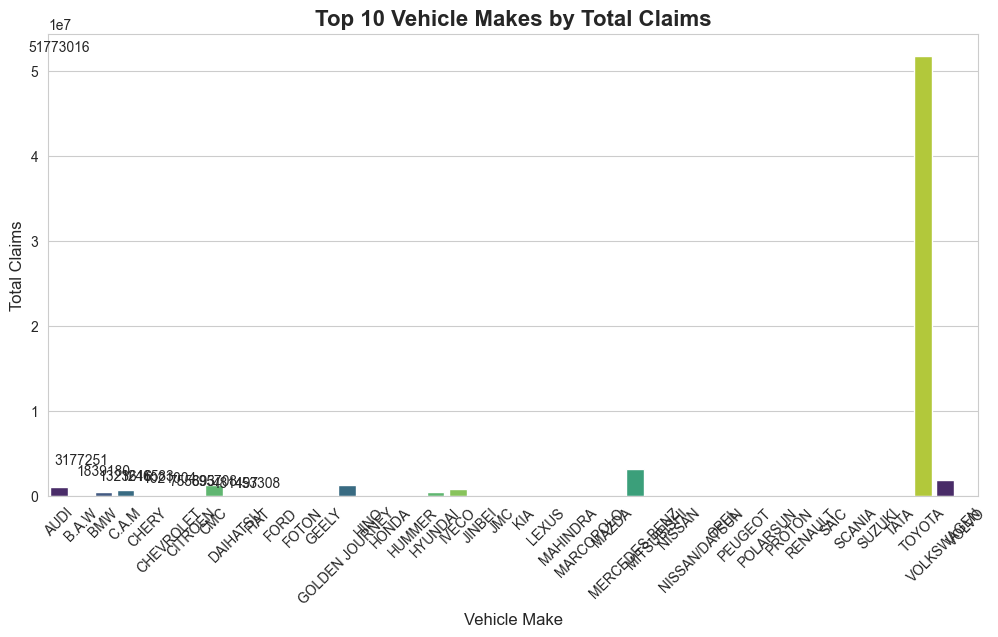

In [17]:

sns.set_style("whitegrid")
palette1 = sns.color_palette("viridis", 10)
palette2 = sns.color_palette("coolwarm", 10)
palette3 = sns.color_palette("magma", 10)

# -------------------------------
# 1️⃣ Loss Ratio by Province (Boxplot)
# -------------------------------
if 'Province' in df.columns:
    plt.figure(figsize=(12,6))
    ax = sns.boxplot(x='Province', y='LossRatio', data=df, palette=palette2)
    plt.title('Distribution of Loss Ratio by Province', fontsize=16, weight='bold')
    plt.ylabel('Loss Ratio', fontsize=12)
    plt.xlabel('Province', fontsize=12)
    
    # Annotate median values
    medians = df.groupby(['Province'])['LossRatio'].median()
    for xtick in ax.get_xticks():
        province = ax.get_xticklabels()[xtick].get_text()
        median_val = medians[province]
        ax.text(xtick, median_val + 0.01, f'{median_val:.2f}', 
                horizontalalignment='center', size='small', color='black', weight='semibold')
    
    plt.show()

# -------------------------------
# 2️⃣ Top 10 Vehicle Makes by TotalClaims (Bar Plot)
# -------------------------------
if 'make' in df.columns:
    top_vehicles = df.groupby('make')['TotalClaims'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12,6))
    ax = sns.barplot(x=top_vehicles.index, y=top_vehicles.values, palette=palette1)
    plt.title("Top 10 Vehicle Makes by Total Claims", fontsize=16, weight='bold')
    plt.ylabel("Total Claims", fontsize=12)
    plt.xlabel("Vehicle Make", fontsize=12)
    plt.xticks(rotation=45)
    
    # Annotate values on bars
    for i, v in enumerate(top_vehicles.values):
        ax.text(i, v + max(top_vehicles.values)*0.01, f"{v:.0f}", ha='center', fontsize=10)
    
    plt.show()

